In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Abstract
#### 1. Load Dataset & EDA
#### 1. Data Preprocessing
#### 3. Model
#### 4. Training
#### 5. Test

In [ ]:
data = pd.read_csv('/content/sample_data/SMSSpamCollection.csv', sep='\t', header=None, names=['Category', 'Message'])
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


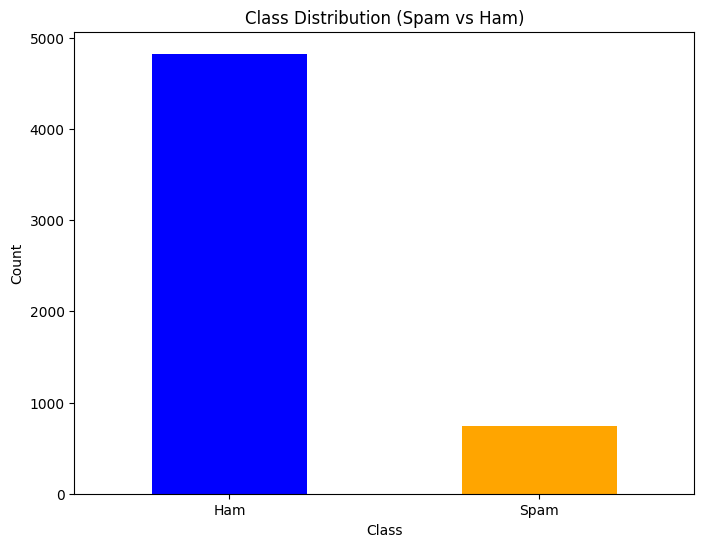

In [ ]:
import matplotlib.pyplot as plt

# Plotting class distribution
plt.figure(figsize=(8, 6))
data['Category'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution (Spam vs Ham)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0, ticks=[0, 1], labels=['Ham', 'Spam'])  # 设置刻度位置和标签
plt.show()



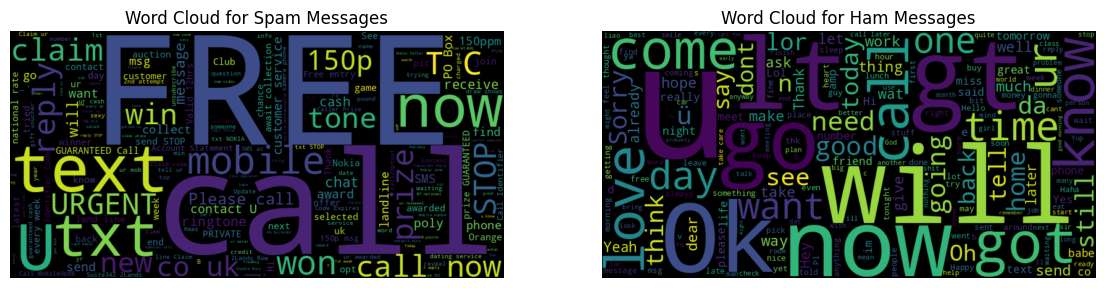

In [ ]:
from wordcloud import WordCloud

# Generating word cloud for spam messages
spam_messages = ' '.join(data[data['Category'] == 'spam']['Message'])
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_messages)

# Generating word cloud for ham messages
ham_messages = ' '.join(data[data['Category'] == 'ham']['Message'])
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_messages)

# Plotting word clouds
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.show()


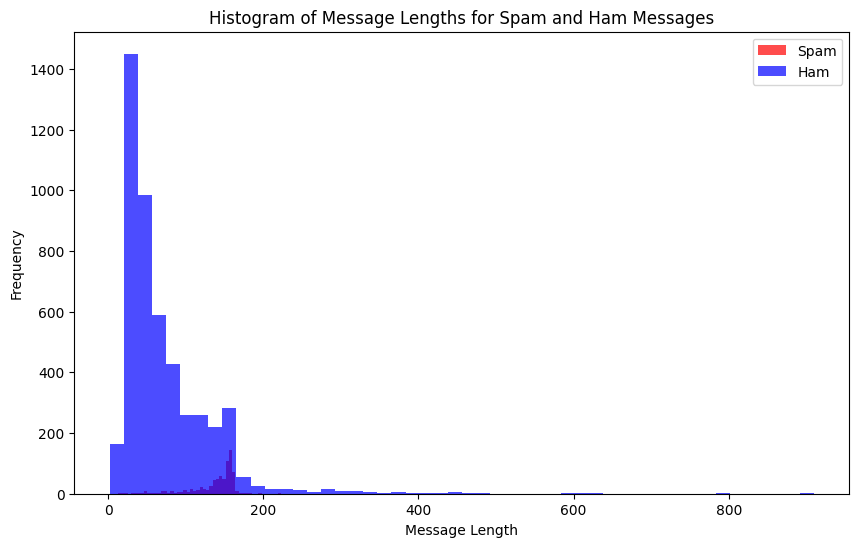

In [ ]:
# Plotting histogram of message lengths for spam and ham messages
plt.figure(figsize=(10, 6))
plt.hist(data[data['Category'] == 'spam']['Message'].apply(len), bins=50, color='red', alpha=0.7, label='Spam')
plt.hist(data[data['Category'] == 'ham']['Message'].apply(len), bins=50, color='blue', alpha=0.7, label='Ham')
plt.title('Histogram of Message Lengths for Spam and Ham Messages')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


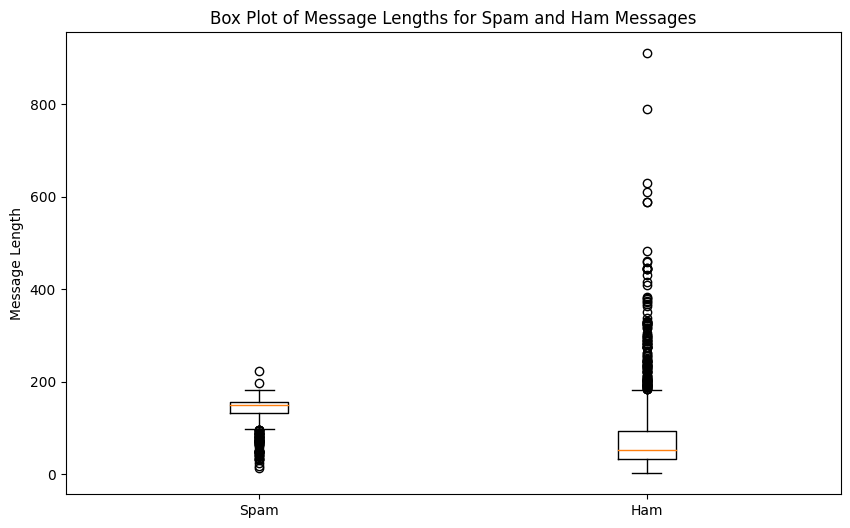

In [ ]:
# Plotting box plot comparing message lengths between spam and ham messages
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['Category'] == 'spam']['Message'].apply(len), data[data['Category'] == 'ham']['Message'].apply(len)], labels=['Spam', 'Ham'])
plt.title('Box Plot of Message Lengths for Spam and Ham Messages')
plt.ylabel('Message Length')
plt.show()


## Native Bayes Model
#### 1. Load Dataset & EDA
#### 3. Model & Loss Function
#### 4. Engine
#### 5. Training
#### 6. Test

In [ ]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.25)

In [ ]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

### Tarining The Model

In [ ]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES',
    'Hey Sam, Are you coming for a cricket game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
clf.predict(emails)

array([0, 1, 0, 1])

In [ ]:
clf.score(X_test,y_test)

0.9849246231155779